# Lecture 7 - Decision Trees and Random Forests?

## A simple yet effective way to classify points with several quantitative and qualitative attributes.

### Hosted and maintained by [SAAS Berkeley](saas.berkeley.edu)

*Authored by Joseph Jin*


Reference https://people.eecs.berkeley.edu/~jrs/189/lec/14.pdf

### Using and Building Decision Trees

Decision tree example (from survivors of the Titanic, with percentages of survival):

![Decision tree example](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)

Ok... so how do we build the tree?

![growtree](growtree.png)

### Entropy


This begs the question, how do we determine the "best" split?

We introduce the idea of entropy, which is a value we try to minimize in our tree to find the best split.

To do this, we define a cost function $J(S_i)$.

The best split at a node will minimize $\frac{|S_l|J(S_l) + |S_r|J(S_r)}{|S_l| + |S_r|}$ i.e. the weighted average of the cost of each branch.

We will use entropy as our cost function,

$$H(X) = -\sum_{i=1}^n P(x_i) \log_2 P(x_i)$$

where $P(x_i)$ is the probability of a given class $x_i$.

The importance of entropy can be seen from information gain, which is the difference between the entropy of the parent node and the weighted average of the entropy of the child nodes.

A diagram of this is shown below:

![entropy graph diagram from wikipedia](https://upload.wikimedia.org/wikipedia/commons/2/22/Binary_entropy_plot.svg)


### Coding Example

Accuracy: 0.6871508379888268


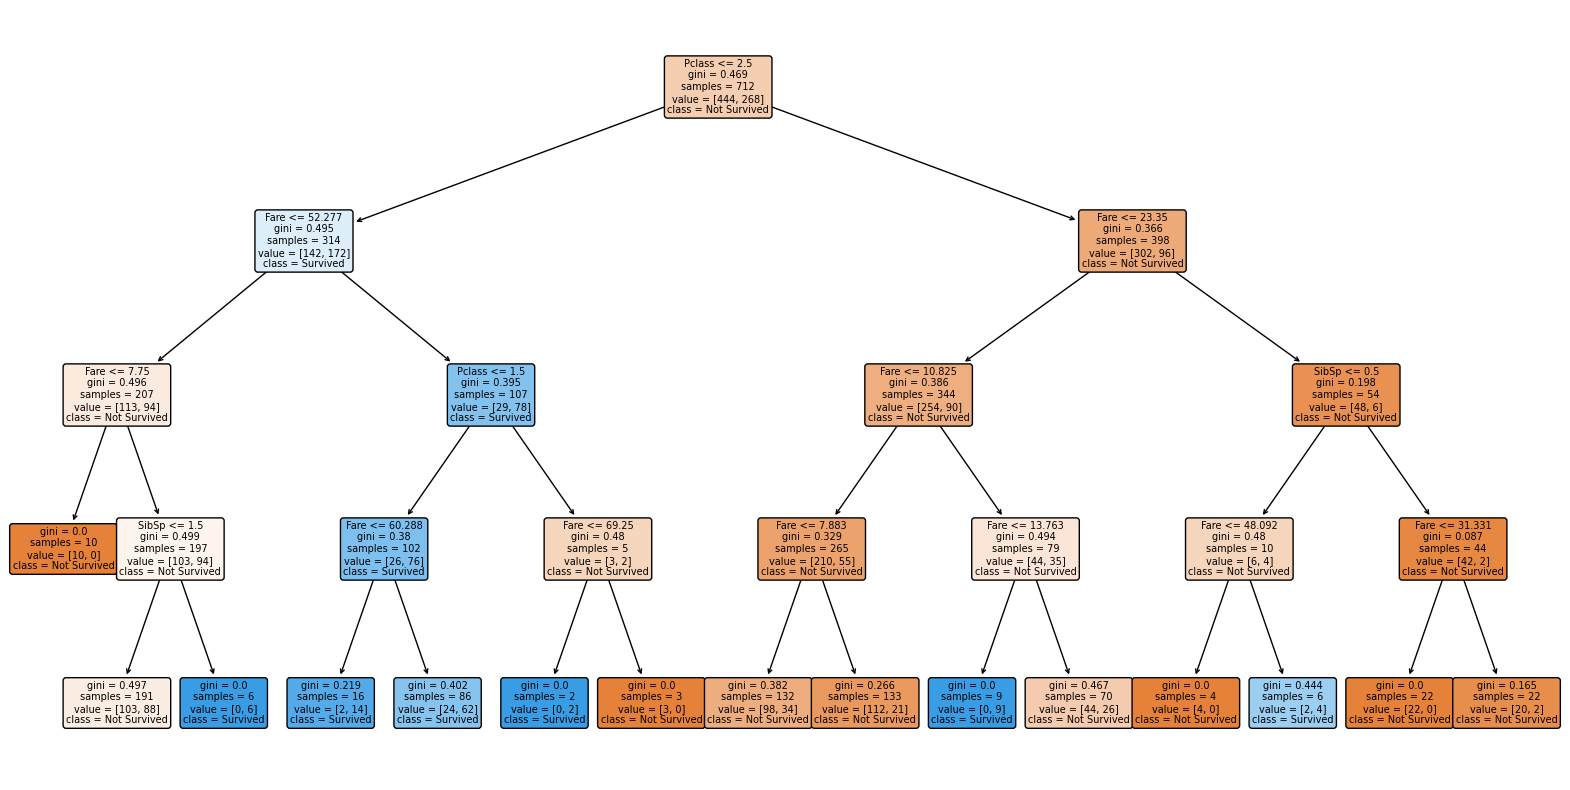

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Step 1: Import CSV files
# Make sure to place this script in the same folder as the 'titanic' folder containing the 'train.csv' file
train_data = pd.read_csv('titanic/train.csv')

# Step 2: Data Preprocessing
features = ['Pclass', 'Fare', 'SibSp']
train_data = train_data[features + ['Survived']].dropna()
X = train_data[features]  # Features
y = train_data['Survived']  # Target variable

# Step 3: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create a Decision Tree model and fit it to the training data
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)

# Step 5: Evaluate the model
# Use the model to make predictions on the validation set
y_pred = clf.predict(X_val)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

# Step 6: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'], rounded=True)
plt.show()


## Ensamble Learning and Random Forests

Reference https://people.eecs.berkeley.edu/~jrs/189/lec/15.pdf

There are some problems with decision trees. The decision boundaries are always straight! This is a problem when we have data that is not linearly separable.

![](rf_boundary.png)

What if we blurred the boundary some how?

Before we continue, let's do an excercise. Without looking on the internet, how many UN recognized countries are there?


Pretty cool huh? Interestingly, this idea generalizes to ensamble learning, which is the idea that multiple weak learners can be combined to form a strong learner.

In a random forest, we have many decision trees, each of which is trained on a random subset of the data. The final prediction is the majority vote of all the trees. Each of these trees are weakers than a vanilla decision tree (they are weak learners), but together they form a strong learner.

Here is how we create a random forest:

At each tree node, take a random sample of m features out of d.

Choose the best split on the m features.

Repeat this for each node.

$m \approx \sqrt{d}$ is best for classification, $m \approx \frac{d}{3}$ is best for regression.

Interestingly, random forests also allow us to classify non-linearly separable data.

![](rf_axis.png)

### Code Example

Accuracy: 0.7039106145251397


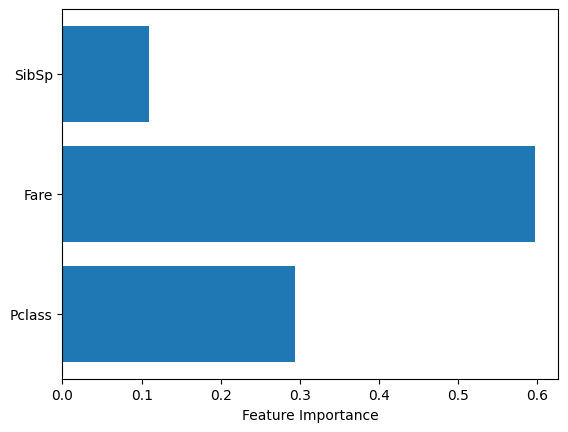

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Step 1: Import CSV files
# Make sure to place this script in the same folder as the 'titanic' folder containing the 'train.csv' file
train_data = pd.read_csv('titanic/train.csv')

# Step 2: Data Preprocessing
features = ['Pclass', 'Fare', 'SibSp']
train_data = train_data[features + ['Survived']].dropna()
X = train_data[features]  # Features
y = train_data['Survived']  # Target variable

# Step 3: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create a Random Forest model and fit it to the training data
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4, max_features=2)
rf_clf.fit(X_train, y_train)

# Step 5: Evaluate the model
# Use the model to make predictions on the validation set
y_pred = rf_clf.predict(X_val)
# Calculate the accuracy of the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy}")

# Step 6: Visualize Feature Importance
feature_importances = rf_clf.feature_importances_
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(range(len(feature_importances)), features)
plt.xlabel('Feature Importance')
plt.show()

## Unsupervised Learning & K-means Clustering

So far we have looked at only regression and classification tasks, where every training data point has a ground truth label (superivsed learning).

What if we want to learn from data without labels? In reality, most data is unlabeled... Learning from this type of data is called unsupervised learning.

Let's inspect the simplest idea in unsupervised learning: k-means clustering.

The k-means clustering algorithm is as follows:

1. Initialize k cluster centers randomly, each with a center determined from the averge of all points in a cluster.

2. Assign each point to the closest cluster center.

3. Update each cluster center to be the mean of the points assigned to it.

4. Repeat steps 2 and 3 until convergence.

![kmeans wiki gif](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)